# Face Recognition(sentiment analysis)
## Table of Contents
## 1.) Understand the Problem Statement
## 2.) Tweets Preprocessing and Cleaning
## 3.) Story Generation and Visualization from Tweets
## 4.) Extracting Features from Cleaned Tweets
## 5.) Model Building: Sentiment Analysis

### 1. Understand the Problem Statement

### The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

### Note: The evaluation metric from this practice problem is F1-Score.

### 2.) Tweets Preprocessing and Cleaning

### importing required libraries

In [2]:
import re
import string
import nltk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

### read/load csv data

In [3]:
df=pd.read_csv("/resources/data/train_2kmZucJ.csv")
df2=pd.read_csv("/resources/data/test_oJQbWVk.csv")

In [4]:
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [5]:
df2.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


In [6]:
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [7]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
id       7920 non-null int64
label    7920 non-null int64
tweet    7920 non-null object
dtypes: int64(2), object(1)
memory usage: 185.7+ KB


In [9]:
df['label'].unique()

array([0, 1])

### As we can see that label column has only two values i.e. 0 &1 (binary values) which is target variable

### Now we will remove all useless words for analysis
### A) Removing Twitter Handles (#, as noticed in 1st tweet)

### For our convenience, let’s first combine train and test set. This saves the trouble of performing the same steps twice on test and train.

In [10]:
combo = df.append(df2, ignore_index=True)

In [11]:
combo.tail()

,id,label,tweet
9868,9869,NaN,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old..."
9869,9870,NaN,Now Available - Hoodie. Check it out here - ht...
9870,9871,NaN,There goes a crack right across the screen. If...
9871,9872,NaN,@codeofinterest as i said #Adobe big time we m...
9872,9873,NaN,Finally I got it .. thanx my father .. #Samsun...


### Given below is a user-defined function to remove unwanted text patterns from the tweets. It takes two arguments, one is the original string of text and the other is the pattern of text that we want to remove from the string. The function returns the same input string but without the given pattern. We will use this function to remove the pattern ‘# , @ ’ from all the tweets in our data.



In [12]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt   

In [13]:
# A) remove twitter handles (@)
combo['tidy_tweet'] = np.vectorize(remove_pattern)(combo['tweet'], "@[\w]*")

### it will remove all words starting with @

In [14]:
combo.tail()

,id,label,tweet,tidy_tweet
9868,9869,NaN,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old...","#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old..."
9869,9870,NaN,Now Available - Hoodie. Check it out here - ht...,Now Available - Hoodie. Check it out here - ht...
9870,9871,NaN,There goes a crack right across the screen. If...,There goes a crack right across the screen. If...
9871,9872,NaN,@codeofinterest as i said #Adobe big time we m...,as i said #Adobe big time we may well as incl...
9872,9873,NaN,Finally I got it .. thanx my father .. #Samsun...,Finally I got it .. thanx my father .. #Samsun...


### Removing Punctuations, Numbers, and Special Characters

In [15]:
# B) remove special characters, numbers, punctuations
combo['tidy_tweet'] = combo['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [16]:
combo.head()

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test https goo gl h ...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...,We love this Would you go #talk #makememorie...
3,4,0.0,I'm wired I know I'm George I was made that wa...,I m wired I know I m George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service Apple won t even talk to...


### C) Removing Short Words
### We have to be a little careful here in selecting the length of the words which we want to remove. So, I have decided to remove all the words having length 3 or less. For example, terms like “hmm”, “oh” are of very little use. It is better to get rid of them.

In [17]:
combo['tidy_tweet'] = combo['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [18]:
combo.head()

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test https MfQV #andro...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally transparant silicon case Thanks uncle ...
2,3,0.0,We love this! Would you go? #talk #makememorie...,love this Would #talk #makememories #unplug #r...
3,4,0.0,I'm wired I know I'm George I was made that wa...,wired know George made that #iphone #cute #dav...
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service Apple even talk about que...


In [19]:
combo.tail()

,id,label,tweet,tidy_tweet
9868,9869,NaN,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old...",#SamsungGalaxyNote Explodes Burns Year Thanks ...
9869,9870,NaN,Now Available - Hoodie. Check it out here - ht...,Available Hoodie Check here http zetasupplies ...
9870,9871,NaN,There goes a crack right across the screen. If...,There goes crack right across screen could act...
9871,9872,NaN,@codeofinterest as i said #Adobe big time we m...,said #Adobe time well include #apple
9872,9873,NaN,Finally I got it .. thanx my father .. #Samsun...,Finally thanx father #Samsung #galaxy #gift #f...


### D) Tokenization
### Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [20]:
tokenized_tweet = combo['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()
tokenized_tweet.tail()

9868    [#SamsungGalaxyNote, Explodes, Burns, Year, Th...
9869    [Available, Hoodie, Check, here, http, zetasup...
9870    [There, goes, crack, right, across, screen, co...
9871          [said, #Adobe, time, well, include, #apple]
9872    [Finally, thanx, father, #Samsung, #galaxy, #g...
Name: tidy_tweet, dtype: object

### E) Stemming
### Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word.

In [21]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [#fingerprint, #pregnanc, test, http, mfqv, #a...
1    [final, transpar, silicon, case, thank, uncl, ...
2    [love, thi, would, #talk, #makememori, #unplug...
3    [wire, know, georg, made, that, #iphon, #cute,...
4    [what, amaz, servic, appl, even, talk, about, ...
Name: tidy_tweet, dtype: object

In [22]:
### lets join these words back now

In [23]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combo['tidy_tweet'] = tokenized_tweet

In [24]:
combo.head()

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #pregnanc test http mfqv #android...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,final transpar silicon case thank uncl #yay #s...
2,3,0.0,We love this! Would you go? #talk #makememorie...,love thi would #talk #makememori #unplug #rela...
3,4,0.0,I'm wired I know I'm George I was made that wa...,wire know georg made that #iphon #cute #davent...
4,5,1.0,What amazing service! Apple won't even talk to...,what amaz servic appl even talk about question...


### 3. Story Generation and Visualization from Tweets

### A) Understanding the common words used in the tweets: WordCloud(A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.)

In [25]:
!pip install WordCloud

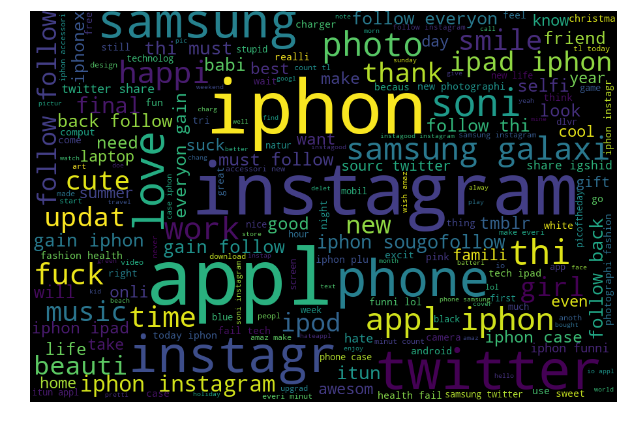

In [26]:
all_words = ' '.join([text for text in combo['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=120).generate(all_words)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### We can see most of the words are positive or neutral. With follow, instagram and love being the most frequent ones. It doesn’t give us any idea about the words associated with the racist/sexist tweets. Hence, we will plot separate wordclouds for both the classes(racist/sexist or not) in our train data.

### B) Words in non racist/sexist tweets

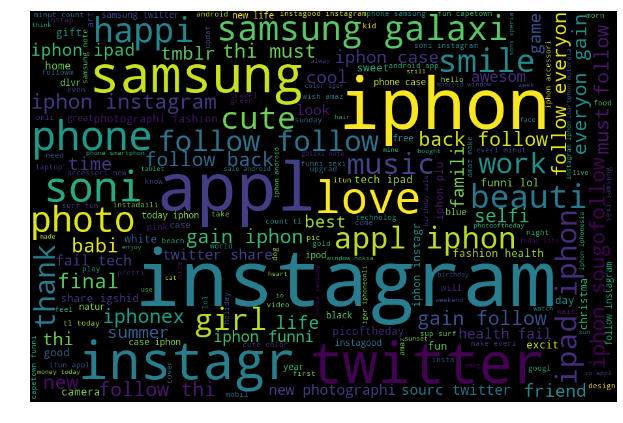

In [27]:
normal_words = ' '.join([text for text in combo['tidy_tweet'][combo['label']==0]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=120).generate(normal_words)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Hence, most of the frequent words are compatible with the sentiment which is non racist/sexists tweets. Similarly, we will plot the word cloud for the other sentiment. Expect to see negative, racist, and sexist terms.

### C) Racist/Sexist Tweets

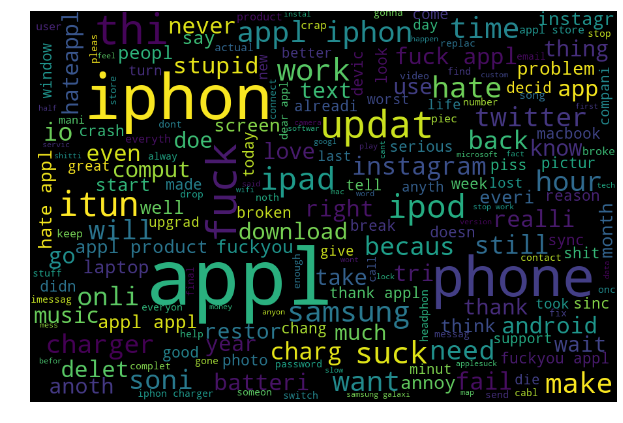

In [28]:
negative_words = ' '.join([text for text in combo['tidy_tweet'][combo['label']==1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=120).generate(negative_words)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### D) Understanding the impact of Hashtags on tweets sentiment

### We will store all the trend terms in two separate lists — one for non-racist/sexist tweets and the other for racist/sexist tweets.

In [29]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [30]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combo['tidy_tweet'][combo['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combo['tidy_tweet'][combo['label'] == 1])


In [31]:

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

### Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top n hashtags.

### Non-Racist/Sexist Tweets

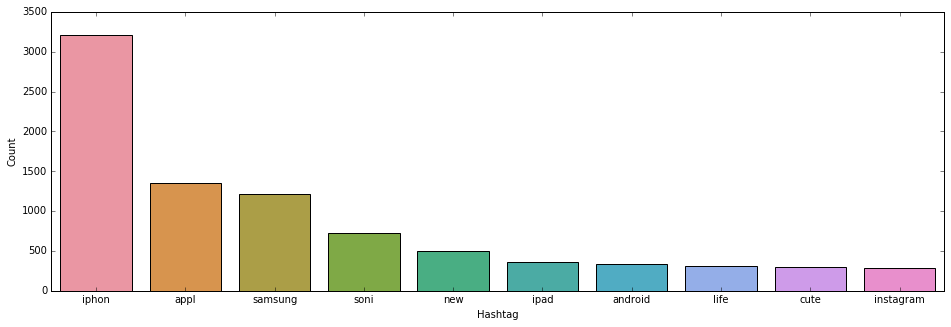

In [34]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

### Racist/Sexist Tweets

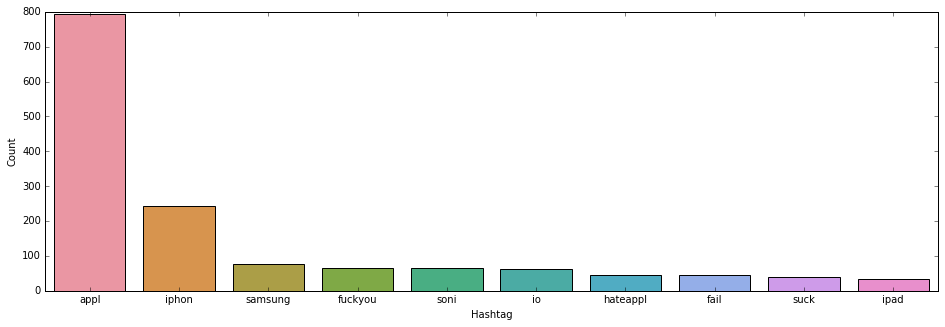

In [35]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

### 4. Extracting Features from Cleaned Tweets
### To analyze a preprocessed data, it needs to be converted into features. Depending upon the usage, text features can be constructed using assorted techniques – Bag-of-Words, TF-IDF, and Word Embeddings. In this, we will be covering only Bag-of-Words and TF-IDF.

### Bag-of-Words Features

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combo['tidy_tweet'])
bow

<9873x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 77796 stored elements in Compressed Sparse Row format>

### TF-IDF Features

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combo['tidy_tweet'])
tfidf

<9873x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 77796 stored elements in Compressed Sparse Row format>

### 5. Model Building: Sentiment Analysis

### A) Building model using Bag-of-Words features

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [46]:
df_bow = bow[:7920,:]
df2_bow = bow[7920:,:]

# splitting data into training and validation set
xdf_bow, xvalid_bow, ydf, yvalid = train_test_split(df_bow, df['label'], random_state=42, test_size=0.3)


In [47]:
lreg = LogisticRegression()
lreg.fit(xdf_bow, ydf) # training the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)
prediction_int

array([0, 1, 0, ..., 1, 1, 1])

In [50]:
f1_score(yvalid, prediction_int) # calculating f1 score

0.8061366806136679

### We trained the logistic regression model on the Bag-of-Words features and it gave us an F1-score of 0.81 for the validation set. Now we will use this model to predict for the test data.

In [53]:
test_pred = lreg.predict_proba(df2_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
df2['label'] = test_pred_int

### submisssion format

In [75]:
submission = df2[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

In [76]:
new_lr_bow=pd.read_csv("sub_lreg_bow.csv")

In [82]:
from IPython.display import HTML
import base64

def create_download_link( submission, title = "Download CSV file", filename = "sub_lreg_bow.csv"):  
    csv = submission.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(submission)

### The F1 score is 0.81. Now we will again train a logistic regression model but this time on the TF-IDF features. Let’s see how it performs.

In [58]:
df_tfidf = tfidf[:7920,:]
df2_tfidf = tfidf[7920:,:]

In [59]:
xdf_tfidf = df_tfidf[ydf.index]
xvalid_tfidf = df_tfidf[yvalid.index]

In [61]:
lreg.fit(xdf_tfidf, ydf)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
prediction_int 

array([0, 1, 0, ..., 1, 1, 1])

In [62]:
f1_score(yvalid, prediction_int)

0.817234190410007

### F-1 score came out 0.82 There fore using tfidf features, validation score has been improved little

### We trained the logistic regression model on the tfidf features and it gave us an F1-score of 0.82 for the validation set. Now we will use this model to predict for the test data.

In [64]:
test_pred = lreg.predict_proba(df2_tfidf)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
df2['label'] = test_pred_int

### submisssion format

In [65]:
submission = df2[['id','label']]
submission.to_csv('sub_lreg_tfidf.csv', index=False) # writing data to a CSV file

In [70]:
new_lr_tfidf=pd.read_csv("sub_lreg_tfidf.csv")

In [72]:
new_lr_tfidf.tail()

,id,label
1948,9869,0
1949,9870,0
1950,9871,1
1951,9872,1
1952,9873,0


In [83]:
from IPython.display import HTML
import base64

def create_download_link( submission, title = "Download CSV file", filename = "sub_lreg_tfidf.csv"):  
    csv = submission.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(submission)